In [44]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math
import pandas as pd
from tqdm import tqdm
from glob import glob
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from jcopml.utils import save_model, load_model
from ekstraksi_fitur import ekstrak
from knna import predict_knn

# Feature Extraction GLCM

In [3]:
path_train = glob("dataset/train/*/*.jpg")
path_test = glob("dataset/test/*/*.jpg")
df_train = ekstrak(path_train)
df_test = ekstrak(path_test)
df_train.head(), df_test.head()

Ekstraksi: 100%|█████████████████████████████████████████████████████████████████████| 240/240 [01:46<00:00,  2.26it/s]


(                                                file  energy_0  homogenity_0  \
 0  dataset/train\Blight\0569f31d-50e6-479a-bd60-4...  0.011214    330.148807   
 1  dataset/train\Blight\0654aea3-e038-4876-8088-3...  0.017067    283.370755   
 2  dataset/train\Blight\07f5df82-5df0-446f-a13a-d...  0.007951    219.807025   
 3  dataset/train\Blight\09140ec5-e485-4770-9c5d-d...  0.000547    120.979884   
 4  dataset/train\Blight\09160fba-83ce-4cec-887f-d...  0.012459    232.687438   
 
    entrophy_0   contras_0  energy_45  homogenity_45  entrophy_45  contras_45  \
 0    8.092978  329.148807   0.011168     394.182900     8.142456  393.182900   
 1    7.803183  282.370755   0.017005     396.875504     7.905336  395.875504   
 2    7.876571  218.807025   0.007931     223.833964     7.887652  222.833964   
 3    7.956551  119.979884   0.000536     136.978796     7.991276  135.978796   
 4    7.956458  231.687438   0.012522     256.679955     8.006525  255.679955   
 
    energy_90  homogenit

# Save Extracted Dataset to .csv

In [82]:
# df_train.to_csv(r'df_train.csv', index=False)
# df_test.to_csv(r'df_test.csv', index=False)

# Find the best n_neighbor

In [91]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler


def split(data):
    X = data.drop(columns=["Target", "file"])
    y = data.Target
    return X, y


def predict_knn(train, test, neighbor):
    X_train, y_train = split(train)
    X_test, y_test = split(test)

    scaler = MinMaxScaler()
    scaler.fit(X_train)

    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    train_score = []
    test_score = []

    for k in neighbor:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train_scaled, y_train)

        train_score.append(knn.score(X_train_scaled, y_train))
        test_score.append(knn.score(X_test_scaled, y_test))
        
    return train_score, test_score, X_test_scaled

Max test score: 0.8791666666666667
n_neighbor: 11


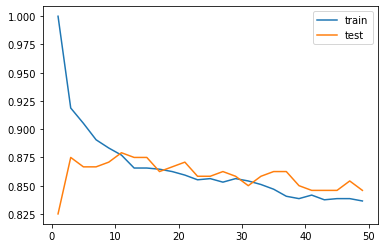

In [99]:
neighbor = range(1, 51, 2)
train_score, test_score, X_test_scaled = predict_knn(df_train, df_test, neighbor)

plt.plot(neighbor, train_score, label="train")
plt.plot(neighbor, test_score, label="test")
plt.legend()

print(f"Max test score: {np.max(test_score)}")
print(f"n_neighbor: {neighbor[np.argmax(test_score)]}")

# Training Data

In [101]:
knn = KNeighborsClassifier(n_neighbors= neighbor[np.argmax(test_score)])
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=11)

# Save Model

In [102]:
# save_model(knn, "model.pkl")

Model is pickled as model/model.pkl


# Load Model

In [103]:
new_model = load_model('model/model.pkl')
new_model

KNeighborsClassifier(n_neighbors=11)

# Predict

In [104]:
new_model.predict(X_test_scaled[:1])

array(['Blight'], dtype=object)